In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ruta = "dataset_banco.csv"
data = pd.read_csv(ruta)

In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


1. Datos faltantes en alguna celda(celdas en blanco)
2. Columnas irrelevantes
3. Registros repetidos (eliminar filas repetidas)
4. Valores extremos (outliers) ejm edades > 200 years
5. Errores tipograficos

In [4]:
data.dropna(inplace=True)  # Elimina la fila completa donde haya datos faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [5]:
# Variables categoricas

cols_cat = ['job','marital','education','default','housing','loan','contact','month','previous','poutcome','y']
for col in cols_cat:
    print(f'columna{col}: {data[col].nunique()} subniveles')

columnajob: 18 subniveles
columnamarital: 6 subniveles
columnaeducation: 10 subniveles
columnadefault: 2 subniveles
columnahousing: 2 subniveles
columnaloan: 6 subniveles
columnacontact: 5 subniveles
columnamonth: 12 subniveles
columnaprevious: 41 subniveles
columnapoutcome: 6 subniveles
columnay: 2 subniveles


In [6]:
# Variables numericas 
data.describe() 
# si la std en alguna columna es 0, se debe eliminar la columna.

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
print(f'Tamano del dataset antes de eliminar filas repetidas : {data.shape}')
data.drop_duplicates(inplace=True) # elimina las filas duplicadas
print(f'Tamano del set despues de eliminar las filas repetidas : {data.shape}')

Tamano del dataset antes de eliminar filas repetidas : (45207, 17)
Tamano del set despues de eliminar las filas repetidas : (45203, 17)


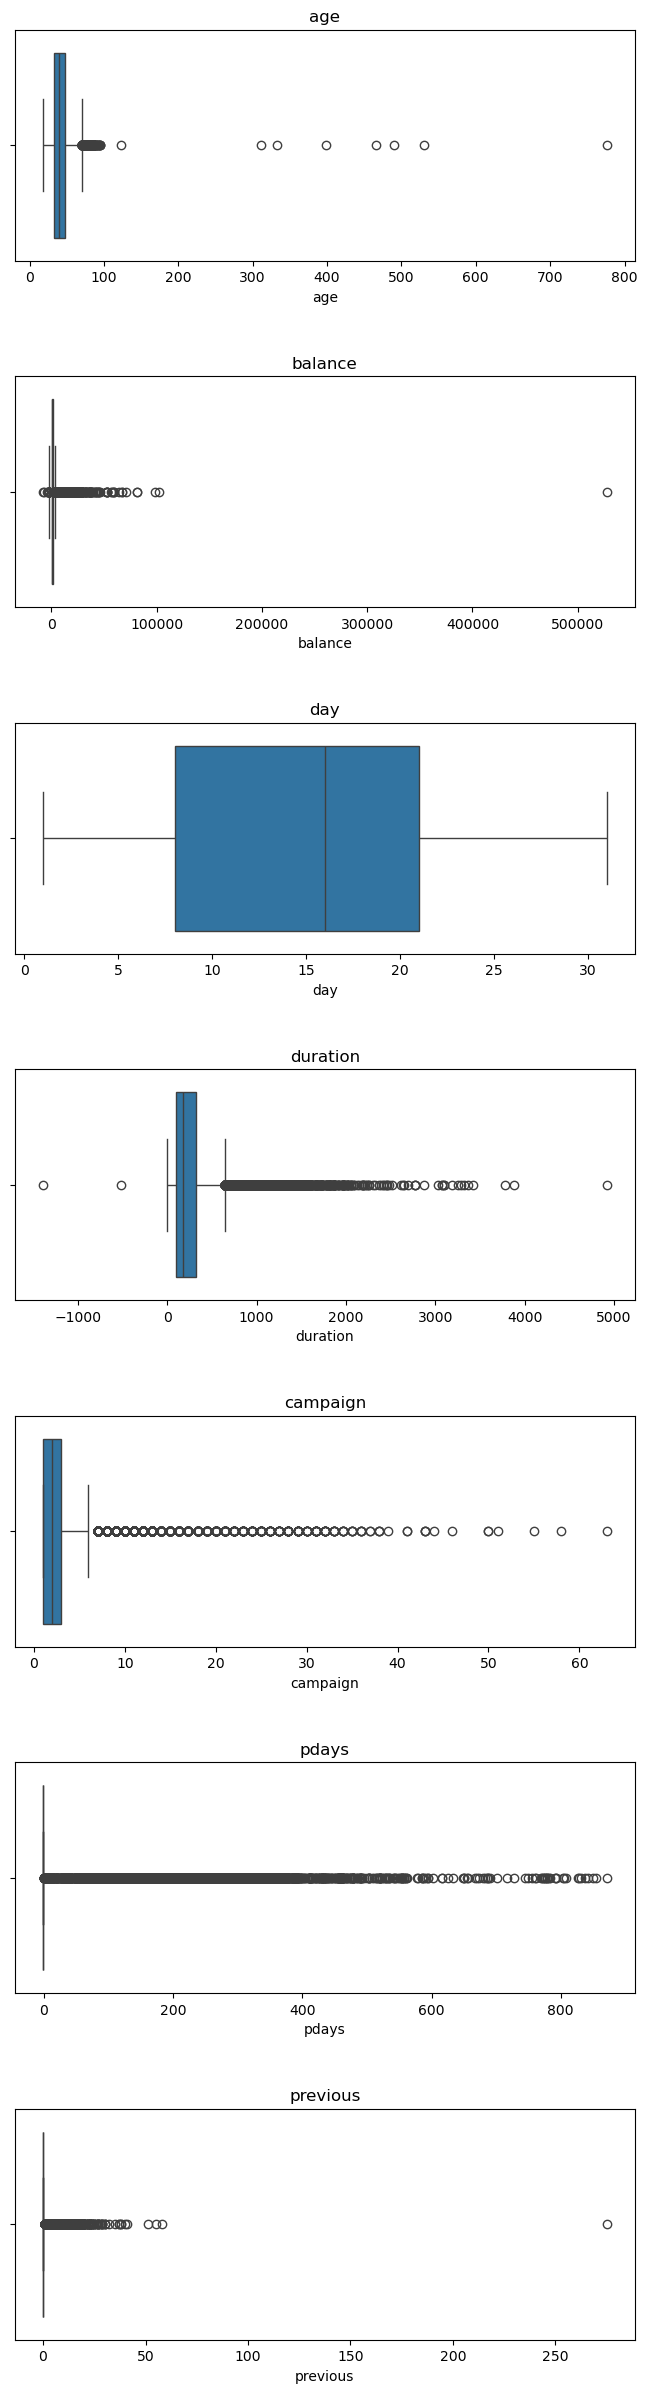

In [9]:
cols_num = ['age','balance','day','duration','campaign','pdays','previous']
fig, ax = plt.subplots(nrows=7,ncols=1,figsize = (8,30))  # crea una figura de 7 subgraficas dispuesto en la columna
fig.subplots_adjust(hspace=0.5) # ajusta el espaciado vertical entre subgraficos
for i,col in enumerate(cols_num):
    sns.boxplot(x=col, data=data , ax=ax[i])
    ax[i].set_title(col)

In [10]:
print(f'Tamano del set antes de depurar la edad: {data.shape}')
data = data[data['age']<=100]
print(f'tamano del set despues de depurar: {data.shape}')


Tamano del set antes de depurar la edad: (45203, 17)
tamano del set despues de depurar: (45195, 17)


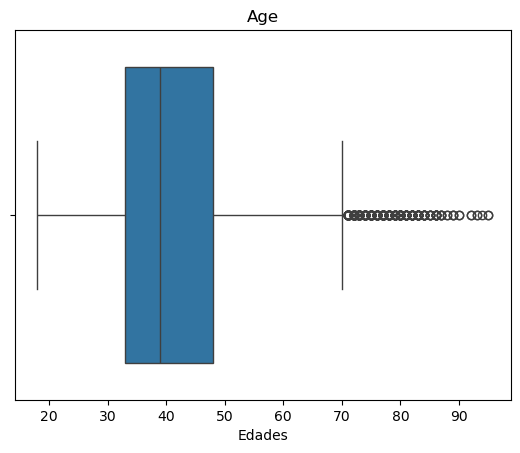

In [20]:
sns.boxplot(x='age', data=data)

plt.xlabel('Edades')
plt.title('Age')
plt.show()

In [15]:
print(f'tamano del set antes de la depuracion de duration: {data.shape}')
data = data[data['duration']>0]
print(f'tamano del set despues de la depuracion de duration: {data.shape}')


tamano del set antes de la depuracion de duration: (45195, 17)
tamano del set despues de la depuracion de duration: (45190, 17)


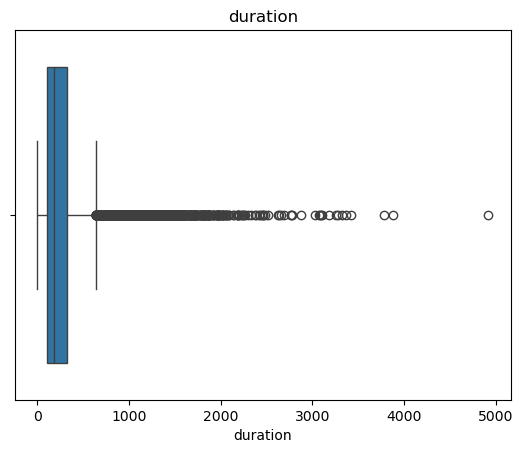

In [21]:
sns.boxplot(x='duration', data=data)
plt.xlabel('duration')
plt.title('Duration')
plt.show()